**1.	What data did you use? If it is a book from Gutenberg, which one?**

Load the text file Le Petit Prince from the Web

In [1]:
from urllib.request import urlopen
url = "http://lepetitprinceexupery.free.fr/telecharger/le-petit-prince--antoine-de-saint-exupery.txt"
text = urlopen(url).read().decode("Windows-1252")
text[:100]

"lepetitprinceexupery.free.fr\n****************************\n\n\nChapitre 1\n\nLorsque j'avais six ans j'ai"

Take only the text

In [2]:
marker = 'lepetitprinceexupery.free.fr\n****************************\n\n\n'
startPosition = text.index(marker) + len(marker)
content = text[startPosition:]

In [3]:
marker = '\n\n\n\n\n****************************\nlepetitprinceexupery.free.fr'
endPosition = text.index(marker) - len(marker)
content1 = content[:endPosition]
content1[-600:]

'l\'autre, et ça suffit ! Il a oublié, un soir, le globe de verre, ou bien le mouton est sorti sans bruit pendant la nuit..."Alors les grelots se changent tous en larmes ! ...\n\nC\'est là un bien grand mystère. Pour vous qui aimez aussi le petit prince, comme pour moi, rien de l\'univers n\'est semblable si quelque part, on ne sait où, un mouton que nous ne connaissons pas a, oui ou non, mangé une rose...\n\nRegardez le ciel. Demandez-vous : Le mouton oui ou non a-t-il mangé la fleur ? Et vous verrez comme tout change...\n\nEt aucune grande personne ne comprendra jamais que ça a tellement d\'importance !'

In [4]:
content1

'Chapitre 1\n\nLorsque j\'avais six ans j\'ai vu, une fois, une magnifique image, dans un livre sur la Forêt Vierge qui s\'appelait"Histoires Vécues". Ça représentait un serpent boa qui avalait un fauve. Voilà la copie du dessin.\n\nOn disait dans le livre :"Les serpents boas avalent leur proie tout entière, sans la mâcher. Ensuite ils ne peuvent plus bouger et ils dorment pendant les six mois de leur digestion."\n\nJ\'ai alors beaucoup réfléchi sur les aventures de la jungle et, à mon tour, j\'ai réussi, avec un crayon de couleur, à tracer mon premier dessin. Mon dessin numéro i. Il était comme ça :\n\nJ\'ai montré mon chef-d\'oeuvre aux grandes personnes et je leur ai demandé si mon dessin leur faisait peur.\nElles m\'ont répondu :"Pourquoi un chapeau ferait-il peur ?"\n\nMon dessin ne représentait pas un chapeau. Il représentait un serpent boa qui digérait un éléphant. J\'ai alors dessiné l\'intérieur du serpent boa, afin que les grandes personnes puissent comprendre. Elles ont touj

Segmentation by chapters

In [5]:
chapters = content1.split('hapitre ')
print(len(chapters), 'chapters ???')
# Problem with the chapter 4 (write chapitre and not Chapitre)

28 chapters ???


In [6]:
import re # a regular-expression library
four = re.sub('chapitre 4', 'Chapitre 4', content1)
chapters = four.split('Chapitre ')
chapters[4]

'4\n\nJ\'avais ainsi appris une seconde chose très importante : C\'est que sa planète d\'origine était à peine plus grande qu\'une maison !\n\nÇa ne pouvait pas m\'étonner beaucoup. Je savais bien qu\'en dehors des grosses planètes comme la Terre, Jupiter, Mars, Vénus, auxquelles on a donné des noms, il y en a des centaines d\'autres qui \tsont quelquefois si petites qu\'on a beaucoup de mal à les apercevoir au télescope. Quand un astronome découvre l\'une d\'elles, il lui donne pour nom un numéro. Il l\'appelle par exemple :"l\'astéroïde 3251".\n\nJ\'ai de sérieuses raisons de croire que la planète d\'où venait le petit prince est l\'astéroïde B 612. Cet astéroïde n\'a été aperçu qu\'une fois au télescope, en 1909 par un astronome turc.\n\nIl avait fait alors une grande démonstration de sa découverte à un Congrès International d\'Astronomie. Mais personne ne l\'avait cru à cause de son costume. Les grandes personnes sont comme ça.\n\nHeureusement pour la réputation de l\'astéroïde B 6

In [7]:
nodigits = re.sub(r'[0-9]+', '', four)
#print('No digits:', nodigits[:100])
clean = re.compile(r'\s+') # also combine any kind of repeated whitespace into a single space
ok = clean.sub(' ', nodigits)
#print('Cleaned:', ok[:100])
chapters_split = ok.split('Chapitre ')
chapters = [ s for s in chapters_split if len(s) > 0] # keep only the ones with content
len(chapters)

27

In [8]:
chapters[26]

'Et maintenant, bien sûr, ça fait six ans déjà... Je n\'ai jamais encore raconté cette histoire. Les camarades qui m\'ont revu ont été bien contents de me revoir vivant. J\'étais triste, mais je leur disais :"C\'est la fatigue..." Maintenant je me suis un peu consolé. C\'est-à-dire... pas tout à fait. Mais je sais bien qu\'il est revenu à sa planète, car, au lever du jour, je n\'ai pas retrouvé son corps. Ce n\'était pas un corps tellement lourd... Et j\'aime la nuit écouter les étoiles. C\'est comme cinq cents millions de grelots... Mais voilà qu\'il se passe quelque chose d\'extraordinaire. La muselière que j\'ai dessinée pour le petit prince, j\'ai oublié d\'y ajouter la courroie de cuir ! Il n\'aura jamais pu l\'attacher au mouton. Alors je me demande :"Que s\'est-il passé sur sa planète ? Peut-être bien que le mouton a mangé la fleur..." Tantôt je me dis :"Sûrement non ! Le petit prince enferme sa fleur toutes les nuits sous son globe de verre, et il surveille bien son mouton..."A

**2.	Can you estimate how many sentences it contains? What can you do to compute this (conceptually, in Python and/or in R)?**

Segmentation by sentence

In [9]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
sent, cnt = [], []
for chap in chapters:
  s=sent_tokenize(chap)
  c=len(s)
  sent.append(s)
  cnt.append(c)
sent[0]

['Lorsque j\'avais six ans j\'ai vu, une fois, une magnifique image, dans un livre sur la Forêt Vierge qui s\'appelait"Histoires Vécues".',
 'Ça représentait un serpent boa qui avalait un fauve.',
 'Voilà la copie du dessin.',
 'On disait dans le livre :"Les serpents boas avalent leur proie tout entière, sans la mâcher.',
 'Ensuite ils ne peuvent plus bouger et ils dorment pendant les six mois de leur digestion."',
 "J'ai alors beaucoup réfléchi sur les aventures de la jungle et, à mon tour, j'ai réussi, avec un crayon de couleur, à tracer mon premier dessin.",
 "Mon dessin numéro i. Il était comme ça : J'ai montré mon chef-d'oeuvre aux grandes personnes et je leur ai demandé si mon dessin leur faisait peur.",
 'Elles m\'ont répondu :"Pourquoi un chapeau ferait-il peur ?"',
 'Mon dessin ne représentait pas un chapeau.',
 'Il représentait un serpent boa qui digérait un éléphant.',
 "J'ai alors dessiné l'intérieur du serpent boa, afin que les grandes personnes puissent comprendre.",
 "El

In [11]:
# Sentence for each chapter
print(cnt)
len(cnt)

[32, 51, 35, 59, 47, 15, 60, 49, 47, 106, 27, 16, 98, 66, 94, 17, 50, 12, 16, 18, 132, 24, 10, 39, 55, 127, 21]


27

In [12]:
#Total sentence in the document
print('Number of sentences in document:' ,sum(cnt))

Number of sentences in document: 1323


**3. How about paragraphs? Can you estimate how many there are? What can you do to compute this (conceptually, in Python and/or in R)?**

Segmentation by paragraph

In [13]:
nodigits = re.sub(r'[0-9]+', '', four)
#print('No digits:', nodigits[:100])
#clean = re.compile(r'\s') # also combine any kind of repeated whitespace into a single space
#ok = clean.sub(' ', nodigits)
#print('Cleaned:', ok[:100])
chapters_split = nodigits.split('Chapitre ')
chapters = [ s for s in chapters_split if len(s) > 0] # keep only the ones with content
len(chapters)

27

In [14]:
chapters[0]

'\n\nLorsque j\'avais six ans j\'ai vu, une fois, une magnifique image, dans un livre sur la Forêt Vierge qui s\'appelait"Histoires Vécues". Ça représentait un serpent boa qui avalait un fauve. Voilà la copie du dessin.\n\nOn disait dans le livre :"Les serpents boas avalent leur proie tout entière, sans la mâcher. Ensuite ils ne peuvent plus bouger et ils dorment pendant les six mois de leur digestion."\n\nJ\'ai alors beaucoup réfléchi sur les aventures de la jungle et, à mon tour, j\'ai réussi, avec un crayon de couleur, à tracer mon premier dessin. Mon dessin numéro i. Il était comme ça :\n\nJ\'ai montré mon chef-d\'oeuvre aux grandes personnes et je leur ai demandé si mon dessin leur faisait peur.\nElles m\'ont répondu :"Pourquoi un chapeau ferait-il peur ?"\n\nMon dessin ne représentait pas un chapeau. Il représentait un serpent boa qui digérait un éléphant. J\'ai alors dessiné l\'intérieur du serpent boa, afin que les grandes personnes puissent comprendre. Elles ont toujours besoi

Ainsi, les paragraphe sont séparé par \n\n

In [15]:
paragraphes, cnt = [],[]
for para in chapters:  
  p = list(filter(lambda x : x != '', para.split('\n\n')))
  c = len(p)
  paragraphes.append(p)
  cnt.append(c)
paragraphes[0]

['Lorsque j\'avais six ans j\'ai vu, une fois, une magnifique image, dans un livre sur la Forêt Vierge qui s\'appelait"Histoires Vécues". Ça représentait un serpent boa qui avalait un fauve. Voilà la copie du dessin.',
 'On disait dans le livre :"Les serpents boas avalent leur proie tout entière, sans la mâcher. Ensuite ils ne peuvent plus bouger et ils dorment pendant les six mois de leur digestion."',
 "J'ai alors beaucoup réfléchi sur les aventures de la jungle et, à mon tour, j'ai réussi, avec un crayon de couleur, à tracer mon premier dessin. Mon dessin numéro i. Il était comme ça :",
 'J\'ai montré mon chef-d\'oeuvre aux grandes personnes et je leur ai demandé si mon dessin leur faisait peur.\nElles m\'ont répondu :"Pourquoi un chapeau ferait-il peur ?"',
 "Mon dessin ne représentait pas un chapeau. Il représentait un serpent boa qui digérait un éléphant. J'ai alors dessiné l'intérieur du serpent boa, afin que les grandes personnes puissent comprendre. Elles ont toujours besoin d

In [16]:
# Paragraph for each chapter
print(cnt)
len(cnt)

[9, 35, 24, 11, 19, 14, 32, 26, 17, 59, 21, 12, 53, 39, 49, 6, 31, 9, 9, 12, 62, 17, 9, 30, 49, 86, 8]


27

In [17]:
#Total paragraphs in the document
print('Number of paragraphs in document:' ,sum(cnt))

Number of paragraphs in document: 748


**4. How many names (of places and people) are mentioned in the text? What did you do to compute this (conceptually, in Python and/or in R)?**

In [18]:
import operator
for c in chapters:
  freq = { w : c.count(w) for w in c.split() } # build a dictionary
  top = max(freq.items(), key = operator.itemgetter(1))[0] # the most frequent word
  longest = max(freq.keys(), key = len) # the longest word
  print(top, longest)

i s'appelait"Histoires
a 'véritablement,
on j'interrogeai
a malheureusement,
a répondit:"Ben!
le Malheureusement
a servent-elles
a Pardonnez-moi...
en orgueilleuse...
a essentiellement
es Malheureusement
le définitivement
a extraordinaires",
a respectueusement
a signifie"éphémère"?
de Nouvelle-Zélande
a conseillerez
a rencontra
- tabouret."D'une
le ressemblaient
a signifie"apprivoiser"?
le l'aiguilleur.
- cinquante-trois
en raisonnement,
a l'anniversaire...
a d'extraordinaire.
a d'extraordinaire.


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
skip = stopwords.words('french')
print(skip)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
from string import punctuation
for chapter in chapters:
  nopunct = chapter.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
  clean = re.compile(r'\s+')
  ok = clean.sub(' ', nopunct) # in case we made repeated spaces
  words = ok.split()
  freq = { w : words.count(w) for w in words if w.lower() not in skip } # build a dictionary of the non-stopwords
  top = max(freq.items(), key = operator.itemgetter(1))[0] # the most frequent word
  longest = max(freq.keys(), key = len) # the longest word
  print(top, longest)

dessin compréhensive
mouton extraordinaire
petit contemplation
a malheureusement
baobabs soigneusement
soleil Malheureusement
fleurs impitoyable
petit contradictoires
fleur soigneusement
roi essentiellement
vaniteux Malheureusement
buveur définitivement
étoiles extraordinaires
allumeur respectueusement
géographe explorateurs
cent travaillaient
petit conseillerez
fleur rencontra
dit imagination
prince ressemblaient
dit ressembleraient
dit poursuivent
dit perfectionnées
petit raisonnement
petit anniversaire
comme extraordinaire
bien extraordinaire


In [21]:
from string import printable # this does not contain mdash & those angled quotes 
print('OK:', printable)
nonprint = f'[^{re.escape(printable)}]'

OK: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [22]:
words = set() # let's collect all the words
for chapter in chapters:
  nopunct = chapter.translate(str.maketrans(punctuation, ' '*len(punctuation)))
  #better = re.sub(nonprint, ' ', nopunct)
  clean = re.compile(r'\s+')
  ok = clean.sub(' ', nopunct) # in case we made repeated spaces
  words.update(set(ok.split())) # include these new words in the set

names = set()
regular = set()
for w in words:
  if len(w) < 3:
    continue # too short for our taste
  u = w.upper() # all uppercase version
  l = w.lower() # all lowercase version
  if w == u: # the word WAS all uppercase
    w = l.capitalize() # just a capital initial, then
  if l in skip or u in skip or w in skip:
    continue # ignore stop words
  if l in words: # not a name since it also appears in lowercase
    regular.add(l) # only keep the lowercase version
  else:
    names.add(w)
print(names)

{'Chine', 'Sahara', 'Quels', 'Frappe', 'Laisse', 'Vierge', 'Ordonnez', 'Rappela', 'Dieu', 'Afrique', 'Tiens', 'Approche', 'Majesté', 'Nord', 'Pourtant', 'Humiliée', 'Demandez', 'Australie', 'Quel', 'Pacifique', 'Indes', 'Noël', 'Arizona', 'Nouvelle', 'Europe', 'Heureusement', 'Vécues', 'Quant', 'Jupiter', 'Reviens', 'Vénus', 'Astronomie', 'Amérique', 'Tâche', 'Sire', 'Zélande', 'International', 'Ensuite', 'Pardonnez', 'Congrès', 'États', 'Mars', 'Unis', 'Russie', 'Regardez', 'Lorsqu', 'Monsieur', 'Ouf', 'Lorsque', 'Bonsoir', 'Évidemment', 'Voyons', 'Riposta', 'Pattes', 'Forêt', 'Ben', 'Sibérie', 'Sud', 'Histoires', 'Hein', 'Acheva', 'Allons', 'France'}


In [23]:
very_names = ('Nord', 'Mars', 'Russie', 'France', 'Chine', 'Dieu', 'États-Unis','Noël','Jupiter','Majesté','Sibérie','Afrique','Sud','Arizona','Amérique du Sud','Amérique du Nord','Europe','Indes','Pacifique','Nouvelle-Zélande','Vénus','Australie','Sahara','Sire')
very_names

('Nord',
 'Mars',
 'Russie',
 'France',
 'Chine',
 'Dieu',
 'États-Unis',
 'Noël',
 'Jupiter',
 'Majesté',
 'Sibérie',
 'Afrique',
 'Sud',
 'Arizona',
 'Amérique du Sud',
 'Amérique du Nord',
 'Europe',
 'Indes',
 'Pacifique',
 'Nouvelle-Zélande',
 'Vénus',
 'Australie',
 'Sahara',
 'Sire')

In [24]:
len(very_names)

24

Expérience infructueuse avec translate et pos_tag...

In [25]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 1.4 MB 10.6 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=f6f20f763aa20bf700910a1ba518922ec4595e8a3ebc06d34bc2b4447103f6a1
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [26]:
# import libraries
import googletrans
from googletrans import Translator
import pandas as pd

In [27]:
# show languages
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [28]:
# use method translate to translate english into japanese
# create a translator object
translator = Translator()
translated_ita = translator.translate('おはようございます。', src='ja', dest='en')
translated_ita.text

'good morning.'

In [29]:
wrds_en = translator.translate(names, src='fr', dest='en')
we = wrds_en.text
we

"{'China', 'Sahara', 'What', 'Knock', 'Leave', 'Virgin', 'Order', 'Remind', 'God', 'Africa', 'Hold', 'Approach', ' Majesty', 'North', 'Yet', 'Humbled', 'Ask', 'Australia', 'What', 'Pacific', 'India', 'Christmas', 'Arizona', 'New', 'Europe' , 'Fortunately', 'Lived', 'Quant', 'Jupiter', 'Return', 'Venus', 'Astronomy', 'America', 'Task', 'Sire', 'Zealand', 'International', ' Then', 'Forgive', 'Congress', 'States', 'Mars', 'United', 'Russia', 'Look', 'When', 'Sir', 'Whew', 'When', 'Good evening' , 'Obviously', 'Let's see', 'Riposta', 'Pattes', 'Forest', 'Ben', 'Siberia', 'South', 'Stories', 'Hein', 'Acheva', 'Let's go', ' France'}"

In [30]:
nopunct = we.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
clean = re.compile(r'\s+')
ok = clean.sub(' ', nopunct) # in case we made repeated spaces
ok

' China Sahara What Knock Leave Virgin Order Remind God Africa Hold Approach Majesty North Yet Humbled Ask Australia What Pacific India Christmas Arizona New Europe Fortunately Lived Quant Jupiter Return Venus Astronomy America Task Sire Zealand International Then Forgive Congress States Mars United Russia Look When Sir Whew When Good evening Obviously Let s see Riposta Pattes Forest Ben Siberia South Stories Hein Acheva Let s go France '

In [31]:
t = ok.split()
l = [ s for s in t if len(s) > 0]
print(l)

['China', 'Sahara', 'What', 'Knock', 'Leave', 'Virgin', 'Order', 'Remind', 'God', 'Africa', 'Hold', 'Approach', 'Majesty', 'North', 'Yet', 'Humbled', 'Ask', 'Australia', 'What', 'Pacific', 'India', 'Christmas', 'Arizona', 'New', 'Europe', 'Fortunately', 'Lived', 'Quant', 'Jupiter', 'Return', 'Venus', 'Astronomy', 'America', 'Task', 'Sire', 'Zealand', 'International', 'Then', 'Forgive', 'Congress', 'States', 'Mars', 'United', 'Russia', 'Look', 'When', 'Sir', 'Whew', 'When', 'Good', 'evening', 'Obviously', 'Let', 's', 'see', 'Riposta', 'Pattes', 'Forest', 'Ben', 'Siberia', 'South', 'Stories', 'Hein', 'Acheva', 'Let', 's', 'go', 'France']


In [32]:
from nltk.tag import pos_tag, pos_tag_sents
nltk.download('averaged_perceptron_tagger')
tag = nltk.pos_tag(l)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [33]:
print(tag)

[('China', 'NNP'), ('Sahara', 'NNP'), ('What', 'WP'), ('Knock', 'NNP'), ('Leave', 'NNP'), ('Virgin', 'NNP'), ('Order', 'NNP'), ('Remind', 'NNP'), ('God', 'NNP'), ('Africa', 'NNP'), ('Hold', 'NNP'), ('Approach', 'NNP'), ('Majesty', 'NNP'), ('North', 'NNP'), ('Yet', 'NNP'), ('Humbled', 'NNP'), ('Ask', 'NNP'), ('Australia', 'NNP'), ('What', 'WP'), ('Pacific', 'NNP'), ('India', 'NNP'), ('Christmas', 'NNP'), ('Arizona', 'NNP'), ('New', 'NNP'), ('Europe', 'NNP'), ('Fortunately', 'RB'), ('Lived', 'VBD'), ('Quant', 'JJ'), ('Jupiter', 'NNP'), ('Return', 'NNP'), ('Venus', 'NNP'), ('Astronomy', 'NNP'), ('America', 'NNP'), ('Task', 'NNP'), ('Sire', 'NNP'), ('Zealand', 'NNP'), ('International', 'NNP'), ('Then', 'RB'), ('Forgive', 'NNP'), ('Congress', 'NNP'), ('States', 'NNPS'), ('Mars', 'NNP'), ('United', 'NNP'), ('Russia', 'NNP'), ('Look', 'NNP'), ('When', 'WRB'), ('Sir', 'NNP'), ('Whew', 'NNP'), ('When', 'WRB'), ('Good', 'NNP'), ('evening', 'NN'), ('Obviously', 'NNP'), ('Let', 'NNP'), ('s', 'PRP'

In [34]:
l=['Look']
m=['Ask']
o=['Look', 'Ask']
p=['Look','me','please','!']

lp = nltk.pos_tag(l)
lm = nltk.pos_tag(m)
lo = nltk.pos_tag(o)
ln = nltk.pos_tag(p)

print(lp,lm,lo,ln)

[('Look', 'VB')] [('Ask', 'VB')] [('Look', 'NNP'), ('Ask', 'NNP')] [('Look', 'VB'), ('me', 'PRP'), ('please', 'VB'), ('!', '.')]


https://www.nltk.org/book/ch05.html: 
Many words, like ski and race, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.

**5. What are the ten most frequent words in the text that you consider to clearly be stop words?**

Par chapitre

In [40]:
top = 10
ok1='' 
text1 = ''

for chapter in chapters:
  nopunct = chapter.translate(str.maketrans(punctuation, ' ' * len(punctuation)))
  #better = re.sub(nonprint, ' ', nopunct)
  ok = clean.sub(' ', nopunct) 
  text1 += ' ' + ok
  words = ok.split()
  freq = { w.lower() : words.count(w) for w in words if w.lower() in skip } # skip names, too, and make these lowercase
  highest = sorted(freq, key = freq.get, reverse = True)[:top]
  print(highest)

['de', 'ai', 'un', 'la', 'à', 'mon', 'j', 'les', 'l', 'leur']
['de', 'je', 'un', 'est', 'à', 'que', 'le', 'me', 'ai', 'moi']
['il', 'est', 'de', 'tu', 'mon', 'ne', 'un', 'que', 'et', 'pas']
['de', 'à', 'un', 'est', 'd', 'l', 'qu', 'ne', 'le', 'vous']
['les', 'de', 'il', 'le', 'd', 'est', 'un', 's', 'des', 'que']
['de', 'le', 'tu', 'ai', 'ta', 'que', 'la', 'mais', 'il', 'se']
['de', 'un', 'je', 'les', 'il', 'n', 'des', 'à', 'une', 'est']
['avait', 'de', 'un', 'ne', 'pas', 'et', 'l', 'le', 'à', 'des']
['il', 'mais', 'de', 'en', 'ne', 'la', 'pas', 'je', 'd', 'elle']
['le', 'de', 'un', 'à', 'd', 'pas', 'je', 'n', 'il', 'et']
['le', 'il', 'l', 'en', 'que', 'de', 'la', 'un', 'pour', 'est']
['le', 'en', 'de', 'une', 'il', 'pour', 'qui', 'un', 'fut', 'dans']
['à', 'est', 'un', 'de', 'je', 'et', 'le', 'il', 'n', 'que']
['le', 'est', 'de', 'il', 'la', 'que', 'un', 'et', 'pas', 'l']
['le', 'est', 'les', 'de', 'des', 'un', 'il', 'une', 'qu', 'ne']
['de', 'd', 'et', 'des', 'l', 'du', 'la', 'une', '

In [41]:
print(skip)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [42]:
text2 = text1.split()
freq = { w : text2.count(w) for w in text2 if w.lower() in skip }
f = nltk.FreqDist(freq)
print(f.most_common(10))

[('de', 427), ('le', 394), ('un', 277), ('est', 263), ('il', 239), ('les', 213), ('la', 195), ('je', 191), ('à', 182), ('pas', 179)]


**7. How would you go about automatically identifying potential stop words for documents
written in a language you do not speak?**

In [43]:
top = 10
for chapter in chapters:
  nopunct = chapter.translate(str.maketrans(punctuation, ' ' * len(punctuation)))
  #better = re.sub(nonprint, ' ', nopunct)
  ok = clean.sub(' ', nopunct) 
  words = ok.split()
  freq = { w.lower() : words.count(w) for w in words if w.lower() not in skip and len(w)>2} # skip names, too, and make these lowercase
  highest = sorted(freq, key = freq.get, reverse = True)[:top]
  print(highest)

['dessin', 'numéro', 'grandes', 'personnes', 'toujours', 'six', 'représentait', 'serpent', 'boa', 'serpents']
['mouton', 'petit', 'tout', 'comme', 'mort', 'bien', 'mille', 'milles', 'bonhomme', 'dessin']
['petit', 'avion', 'prince', 'beaucoup', 'peu', 'alors', 'viens', 'bien', 'longtemps', 'tout']
['plus', 'comme', 'grandes', 'personnes', 'astéroïde', 'ami', 'bien', 'petit', 'planète', 'maison']
['baobabs', 'planète', 'petit', 'prince', 'comme', 'graines', 'jour', 'arbustes', 'herbes', 'bien']
['soleil', 'peu', 'couchers', 'jour', 'coucher', 'france', 'fois', 'petit', 'prince', 'petite']
['fleurs', 'épines', 'comme', 'fleur', 'mouton', 'petit', 'quoi', 'très', 'jamais', 'rien']
['petit', 'prince', 'fleur', 'bien', 'très', 'vite', 'tigres', 'planète', 'fleurs', 'herbe']
['fleur', 'bien', 'volcans', 'matin', 'aussi', 'comme', 'globe', 'dit', 'ramona', 'activité']
['roi', 'petit', 'prince', 'dit', 'répondit', 'tout', 'bien', 'planète', 'soleil', 'juger']
['vaniteux', 'petit', 'prince', 'd

In [44]:
skip += ['tout','très','comme','bien','plus','rien','peu','encore','alors','quel','elles','quand','cette','donc','trop']
freq = { w : text2.count(w) for w in text2 if w.lower() not in skip and len(w)>2}
f = nltk.FreqDist(freq)
print(f.most_common(10))

[('petit', 194), ('prince', 171), ('dit', 149), ('planète', 62), ('fleur', 52), ('jamais', 42), ('étoiles', 39), ('répondit', 38), ('renard', 35), ('mouton', 33)]


**8. Looking at a histogram of the word frequencies (like the horizontal bar chart in the R example code), what can be said about the shape of the distribution?**

In [45]:
import collections
import operator
word_cnt = collections.Counter(f)
count_words, count_values = zip(*word_cnt.items())
values_sorted, words_sorted = zip(*sorted(zip(count_values, count_words), key=operator.itemgetter(0), reverse=True))

In [46]:
words_sorted_top = words_sorted[0:10]
values_sorted_top = values_sorted[0:10]

In [47]:
import pandas as pd
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
df

,count,word
0,194,petit
1,171,prince
2,149,dit
3,62,planète
4,52,fleur
5,42,jamais
6,39,étoiles
7,38,répondit
8,35,renard
9,33,mouton


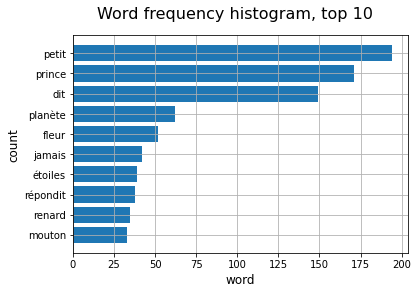

In [48]:
import matplotlib.pyplot as plt
#% matplotlib inline

# creating the data values for the vertical y and horisontal x axis
y = df.iloc[:,0].sort_index(ascending=False)
x = df.iloc[:,1].sort_index(ascending=False)

fig = plt.figure()
fig.suptitle('Word frequency histogram, top {0}'.format(10), fontsize=16)
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)

# using the pyplot.barh funtion for the horizontal bar
plt.barh(x,y)
plt.grid()

# to show our graph
plt.show()

**9. Please show an example of a word cloud you created from your text along with a code snippet of how you did it.**

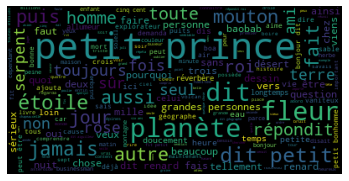

In [49]:
from wordcloud import WordCloud, ImageColorGenerator

draw = ' '.join([ w.lower() for w in text2 if w.lower() not in skip and len(w) > 2 ])
cloud = WordCloud().generate(draw)
plt.imshow(cloud)
plt.axis('off')
plt.show()